In [32]:
# Yeo-Johnson 변환(Yeo-Johnson Transformation)
# 데이터의 정규성(Normality) 을 개선하기 위해 사용하는 비선형 스케일링 기법
# 데이터 분포를 정규분포(가우시안 분포)에 가깝게 만들기 위해 사용

# 목적
# 정규분포와 유사하게 만들기 위해 데이터의 분포를 왜곡을 줄이면서 변형
# 특히 통계 분석, 머신러닝 모델에서 가정된 정규성(normality assumption) 을 만족하도록 도와줌
# 양수, 0, 음수 모두에 적용 가능 → Box-Cox 변환의 확장판

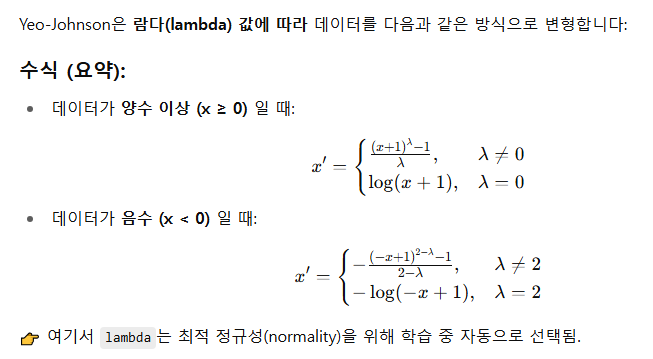

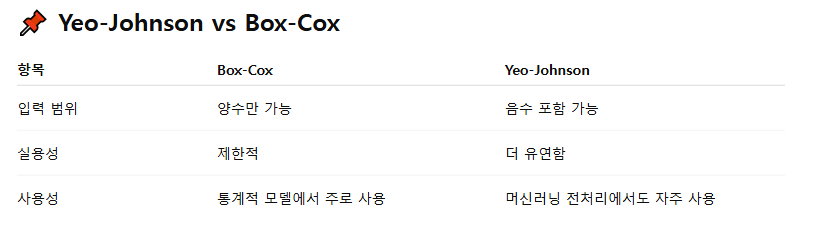

In [33]:
import numpy as np
import pandas as pd

np.random.seed(1234)

df = pd.DataFrame({
    'skewed_positive': np.random.exponential(scale=2, size=1000),  # 오른쪽으로 치우침
    'skewed_negative': -np.random.exponential(scale=2, size=1000), # 왼쪽으로 치우침
    'normal_like': np.random.normal(loc=0, scale=1, size=1000),    # 거의 정규분포
})

df

,skewed_positive,skewed_negative,normal_like
0,0.425197,-1.025343,0.410169
1,1.946298,-5.336152,0.707859
2,1.151538,-1.448599,-1.100797
3,3.077573,-3.317067,1.564850
4,3.028036,-4.270284,0.562243
...,...,...,...
995,10.963633,-0.888476,1.326789
996,5.772127,-2.781740,0.611316
997,0.281156,-4.014936,-0.682902
998,1.461096,-6.167663,-0.920411


In [34]:
from scipy.stats import yeojohnson

df_scipy = df.copy()

result, ld = yeojohnson(df['skewed_positive'])
df_scipy['skewed_positive_yj'] = result

print("lambda :", ld)

result, ld = yeojohnson(df['skewed_negative'])
df_scipy['skewed_negative_yj'] = result

print("lambda :", ld)

result, ld = yeojohnson(df['normal_like'])
df_scipy['normal_like_yj'] = result

print("lambda :", ld)

df_scipy

lambda : -0.33219685159789825
lambda : 2.3345995890108675
lambda : 1.0548080610544777


,skewed_positive,skewed_negative,normal_like,skewed_positive_yj,skewed_negative_yj,normal_like_yj
0,0.425197,-1.025343,0.410169,0.334254,-0.628602,0.414280
1,1.946298,-5.336152,0.707859,0.907878,-1.377318,0.719280
2,1.151538,-1.448599,-1.100797,0.676449,-0.773804,-1.076016
3,3.077573,-3.317067,1.564850,1.123007,-1.156583,1.612364
4,3.028036,-4.270284,0.562243,1.115328,-1.274890,0.569689
...,...,...,...,...,...,...
995,10.963633,-0.888476,1.326789,1.690361,-0.572698,1.362347
996,5.772127,-2.781740,0.611316,1.415706,-1.073601,0.620020
997,0.281156,-4.014936,-0.682902,0.237841,-1.246174,-0.672424
998,1.461096,-6.167663,-0.920411,0.778373,-1.442447,-0.902402


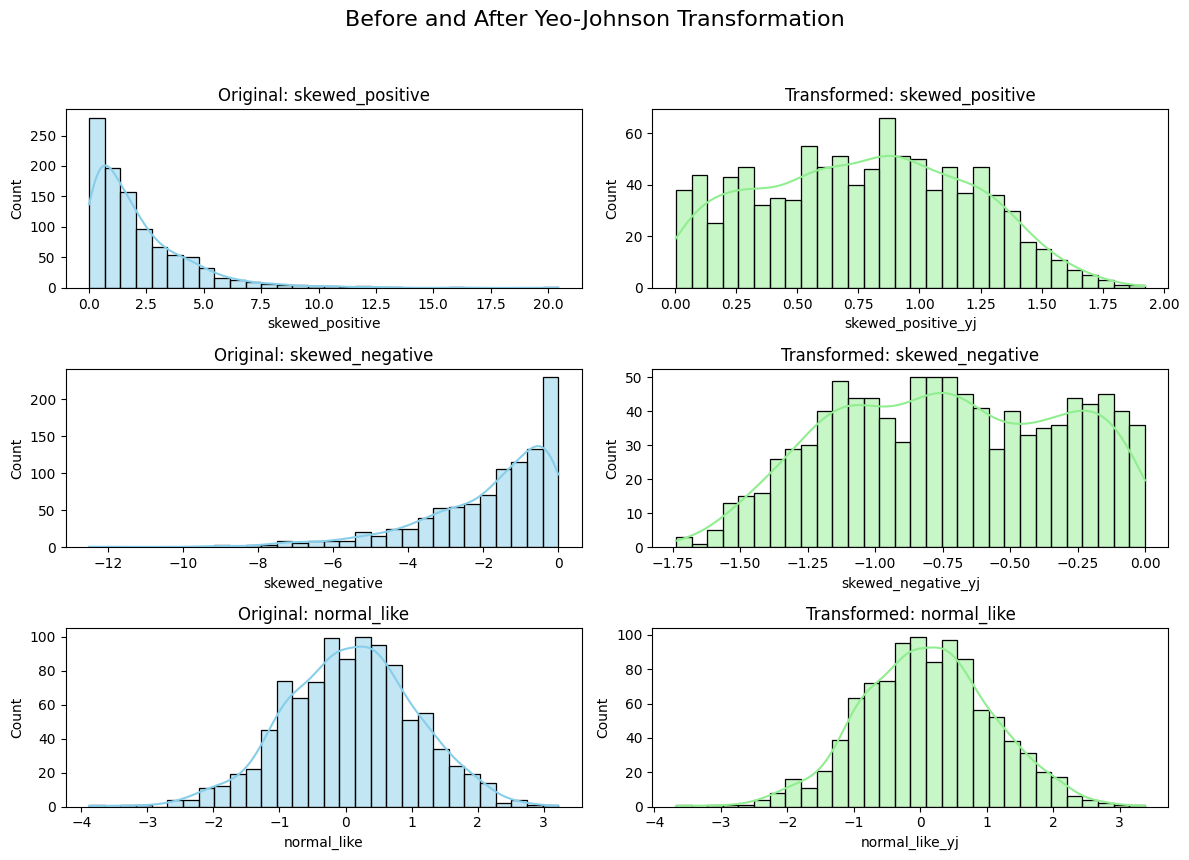

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. 시각화 비교
fig, axes = plt.subplots(3, 2, figsize=(12, 9))
fig.suptitle('Before and After Yeo-Johnson Transformation', fontsize=16)

for i, col in enumerate(['skewed_positive', 'skewed_negative', 'normal_like']):
    # Before
    sns.histplot(df_scipy[col], bins=30, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Original: {col}')
    
    # After
    sns.histplot(df_scipy[col + '_yj'], bins=30, kde=True, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Transformed: {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
#########################################################################################

In [37]:
from sklearn.preprocessing import PowerTransformer

In [38]:
df_sklearn = df.copy()

pt = PowerTransformer(method='yeo-johnson')
transformed_data = pd.DataFrame(pt.fit_transform(df_sklearn), columns=df_sklearn.columns)

transformed_data

,skewed_positive,skewed_negative,normal_like
0,-1.021067,0.233445,0.323377
1,0.327503,-1.548473,0.633394
2,-0.216579,-0.112132,-1.191434
3,0.833261,-1.023131,1.541169
4,0.815209,-1.304697,0.481342
...,...,...,...
995,2.167090,0.366494,1.287039
996,1.521386,-0.825637,0.532501
997,-1.247730,-1.236354,-0.781203
998,0.023041,-1.703477,-1.014964


In [39]:
pt.lambdas_

array([-0.33219685,  2.33459959,  1.05480806])

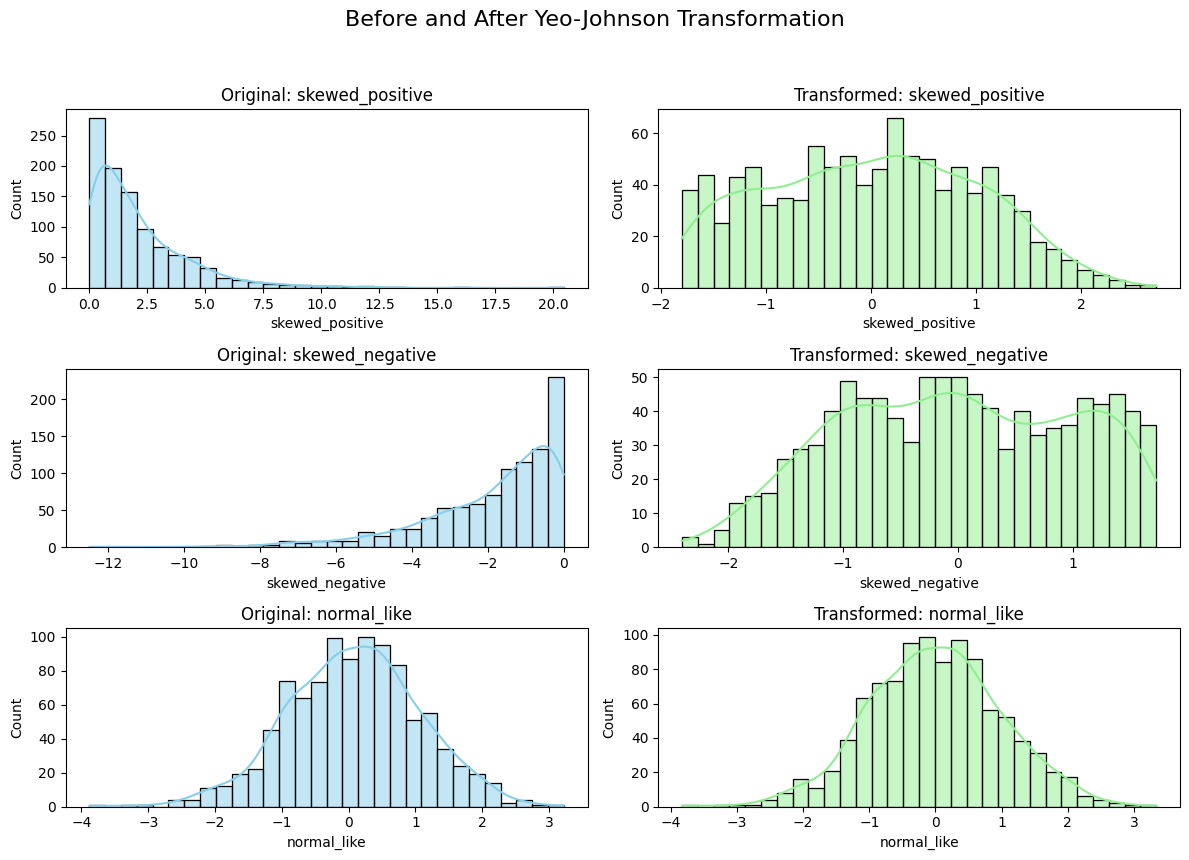

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(12, 9))
fig.suptitle('Before and After Yeo-Johnson Transformation', fontsize=16)

for i, col in enumerate(df_sklearn.columns):
    # Before
    sns.histplot(df_sklearn[col], bins=30, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Original: {col}')
    
    # After
    sns.histplot(transformed_data[col], bins=30, kde=True, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Transformed: {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [42]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# 예제 데이터
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

pt = PowerTransformer(method='yeo-johnson')
X_trans = pt.fit_transform(X)

print("PowerTransformer 변환 결과:")
print(X_trans)
print("적용된 lambda 값:", pt.lambdas_)


PowerTransformer 변환 결과:
[[-1.40883551 -1.39478739]
 [-0.36844753 -0.38670434]
 [ 0.50130355  0.49189032]
 [ 1.2759795   1.28960141]]
적용된 lambda 값: [0.66046336 0.66746044]


In [43]:
from scipy.stats import yeojohnson
import numpy as np

# 1D 데이터 (scipy는 2D 입력 안됨)
x = np.array([1, 3, 5, 7])

# 최적 lambda 계산과 변환값 반환
x_trans, lmbda = yeojohnson(x)

print("scipy yeojohnson 변환 결과:")
print(x_trans)
print("적용된 lambda 값:", lmbda)


scipy yeojohnson 변환 결과:
[0.87906495 2.26850639 3.43006171 4.46464389]
적용된 lambda 값: 0.6604633586628269


In [44]:
import numpy as np
from sklearn.preprocessing import PowerTransformer # 변환 후, 평균 0, 분산 1이 되도록 표준화
from scipy.stats import yeojohnson # 변환만 수행

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# sklearn PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_pt = pt.fit_transform(X)
print("PowerTransformer 변환 결과:")
print(X_pt)
print("PowerTransformer lambda:", pt.lambdas_)

# scipy yeojohnson 각 열별 변환
X_scipy = np.zeros_like(X, dtype=float)
lambdas = []
for i in range(X.shape[1]):
    X_scipy[:, i], lmbda = yeojohnson(X[:, i])
    lambdas.append(lmbda)

print("\nscipy yeojohnson 변환 결과:")
print(X_scipy)
print("scipy lambda:", lambdas)


PowerTransformer 변환 결과:
[[-1.40883551 -1.39478739]
 [-0.36844753 -0.38670434]
 [ 0.50130355  0.49189032]
 [ 1.2759795   1.28960141]]
PowerTransformer lambda: [0.66046336 0.66746044]

scipy yeojohnson 변환 결과:
[[0.87906495 1.62091786]
 [2.26850639 2.88819461]
 [3.43006171 3.9926895 ]
 [4.46464389 4.99550442]]
scipy lambda: [0.6604633586628269, 0.6674604418804972]
